<a href="https://colab.research.google.com/github/kadamatharva26/Titanic-Analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA FOR TITANIC DATA SET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Using heatmap function we can actually see the null values

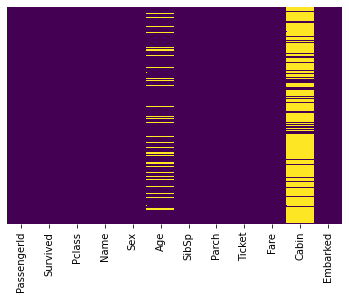

In [7]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
drop_col=train.isnull().sum()[train.isnull().sum()>(35/100 * train.shape[0])]
drop_col

Cabin    687
dtype: int64

In [10]:
drop_col.index

Index(['Cabin'], dtype='object')

In [11]:
train.drop(drop_col.index,axis=1,inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train.fillna(train.mean(),inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
train['Embarked'].fillna('S',inplace=True)

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we can see through heatmap function all the data is cleaned

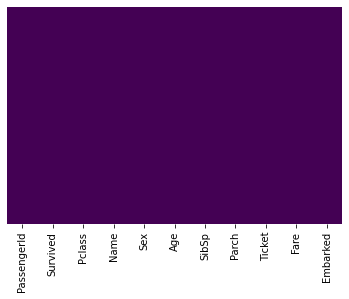

In [18]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [19]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [20]:

train.drop('SibSp',axis=1,inplace=True)


In [21]:
train.corr()

,PassengerId,Survived,Pclass,Age,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.179191,0.091566
Parch,-0.001652,0.081629,0.018443,-0.179191,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.216225,1.000000


Bellow pairplot Function helps to find the correlation between the features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


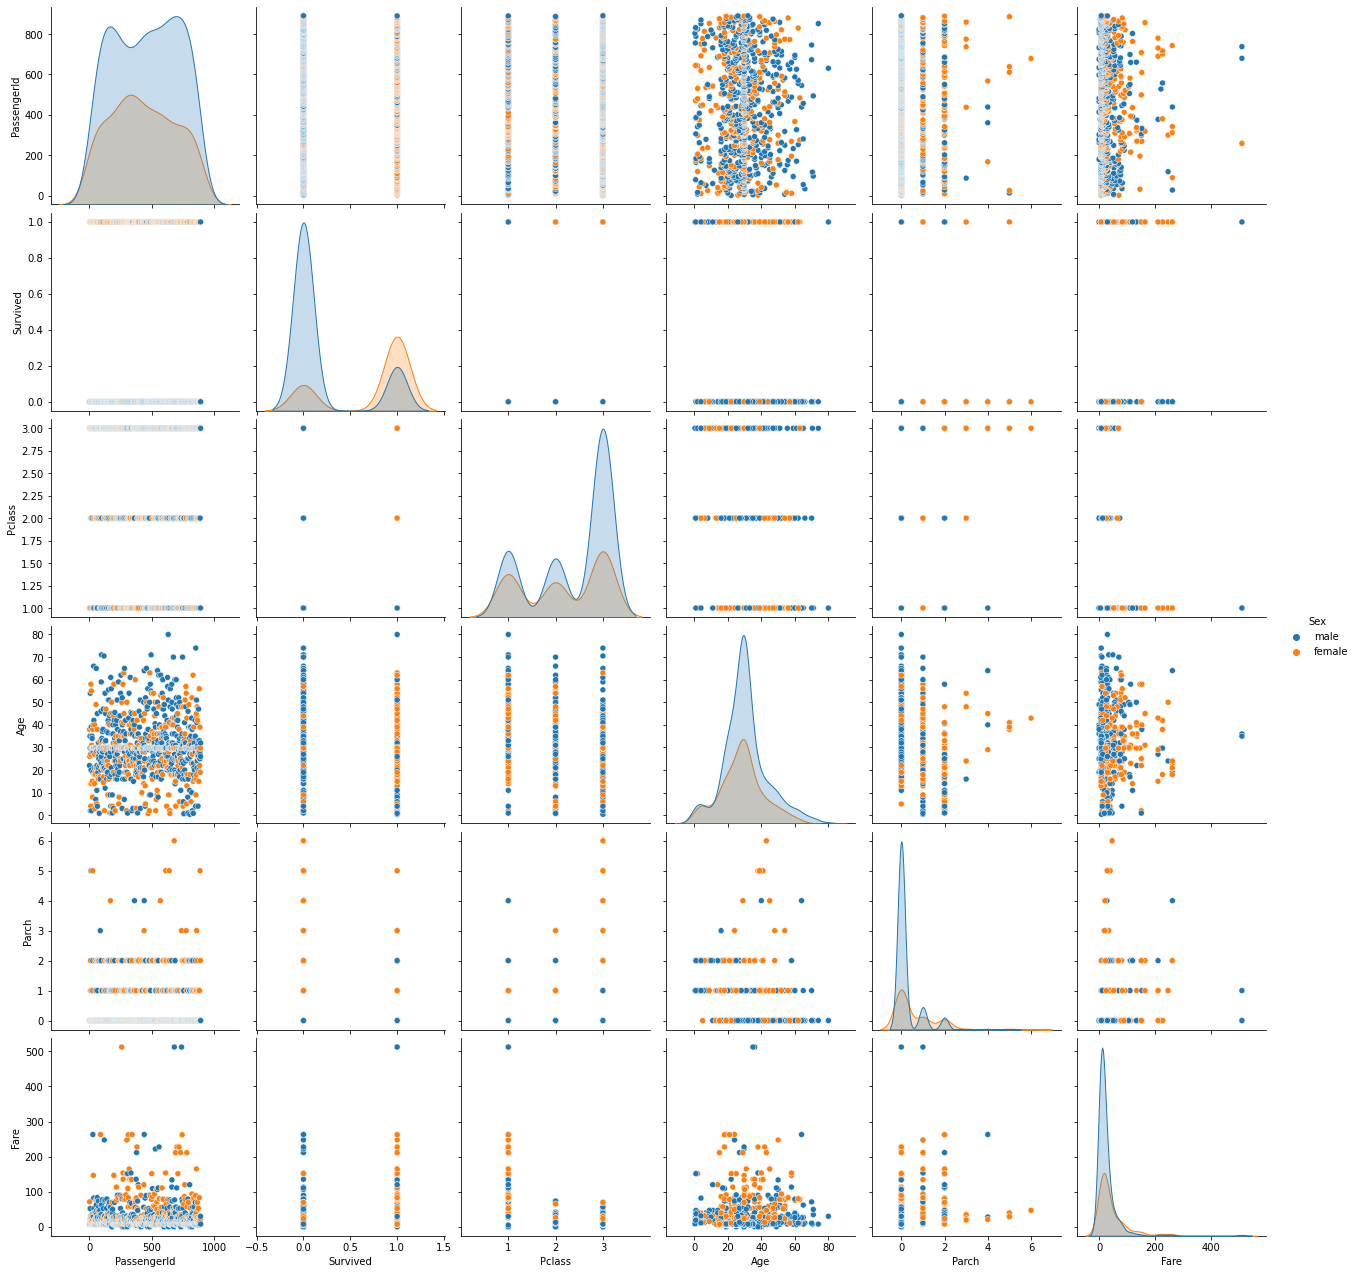

In [22]:
sns.pairplot(train,hue='Sex',size=3)


To Find number of people survived based on sex

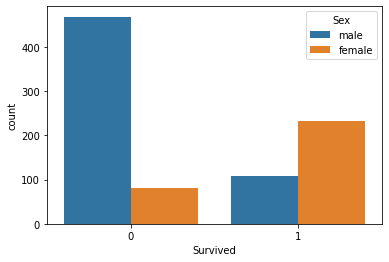

In [23]:
sns.countplot(x='Survived',hue='Sex',data=train)

To find Number of people Survived Based on the passenger Class

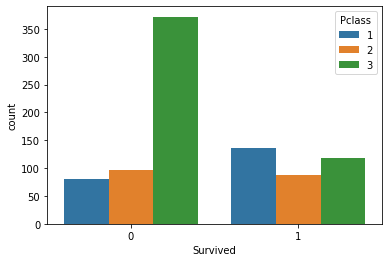

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=train)

In [25]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [26]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


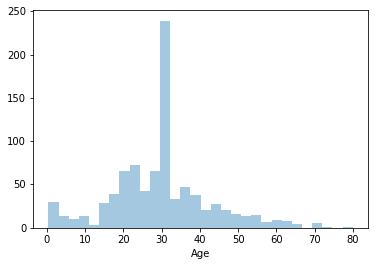

In [29]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [31]:
#as the values are categorial we can convert into boolean values and then dropping the first column.
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [33]:
embar=pd.get_dummies(train['Embarked'],drop_first=True)

In [34]:
train=pd.concat([train,Sex,embar],axis=1)

In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
train.drop('PassengerId',axis=1,inplace=True)

#CONCLUSION

Female passengers were prioritize over men.

Passengers traveling with family members had higher survival rate than others.

Passengers who boarded the ship from Cherbourg survived more in proportion than others.

#Performing Train_Test_Split

In [66]:
train.head(2)

,Survived,Pclass,Age,Fare,male,Q,S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0


In [65]:
train.drop('Parch',axis=1,inplace=True)

In [67]:
X=train.iloc[:,1:]

In [68]:
y=train.iloc[:,:1]


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

#Creating Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred=lg.predict(X_test)


In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[134,  20],
       [ 39,  75]])